# COGS 108 - Assignment 2: Data Exploration

# Important

- Rename this file to 'A2_A########.ipynb' (filled in with your student ID) before you submit it. Submit it to TritonED.
- This assignment has hidden tests: tests that are not visible here, but that will be run on your submitted. 
    - This means passing all the tests you can see in the notebook here does not guarantee you have the right answer!

## Part 1 - Data Wrangling

You are provided with two data files:
- age_steps.csv
- name_income_id.json

In [1]:
# Imports
#  Note: these are all the imports you need! Do not import any other functions / packages
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1a) Load the csv file into a pandas dataframe. Call it 'df_steps'.
# YOUR CODE HERE
df_steps = pd.read_csv("age_steps.csv")

In [3]:
assert isinstance(df_steps, pd.DataFrame)


In [4]:
# 1b) Load the json file into a (different) pandas dataframe. Call it 'df_income'.
# YOUR CODE HERE
df_income = pd.read_json("name_income_id.json")

In [5]:
assert isinstance(df_income, pd.DataFrame)

In [6]:
# 1c) Drop the 'first_name' and 'last_name' columns from the df_income data frame.
# YOUR CODE HERE
del df_income['first_name']
del df_income['last_name']

In [7]:
assert 'first_name' not in df_income.columns
assert 'last_name' not in df_income.columns

In [8]:
# 1d) Combine the two dataframes into one combined, new dataframe. Call it 'df'.
#  Note: For this part, it doesn't in which order you merge the dataframes.

# YOUR CODE HERE
df = pd.merge(df_income, df_steps)

In [9]:
assert isinstance(df, pd.DataFrame)
assert set(df.columns) == set(['id', 'income', 'age', 'steps'])

In [10]:
# 1e) Re-Order the Column ID's to be [id, age, steps, income]
# YOUR CODE HERE
df = df[['id','age','steps','income']]

In [11]:
assert list(df.columns) == ['id', 'age', 'steps', 'income']

## Part 2 - Data Cleaning

In [12]:
# 2a) First check how many missing data (NaNs) there are in the income data.
#  Save this number into a variable called 'n_nan'

# YOUR CODE HERE
n_nan = df_income.isnull().sum().sum()

In [13]:
assert(n_nan)

In [14]:
# 2b) Remove all rows from df that have missing data (that have NaN values)

# YOUR CODE HERE
df = df.dropna()

In [15]:
assert(sum(np.isnan(df['income'])) == 0)

## Data Visualization

- You will be making histograms, check out this example on how to do that.
    - http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html
    - This example has more than you need: 
        - Titles, axis labels, etc are optional (but recommended)
        - You do not need to add a 'best fit' line.
- Everywhere that we ask you to create a plot, make sure to leave the 'plt.gcf()' line at the end of the cell. 
    - This is used to get a figure handle in order to programmatically evaluate your plots.
- For all your histograms, use 25 bins

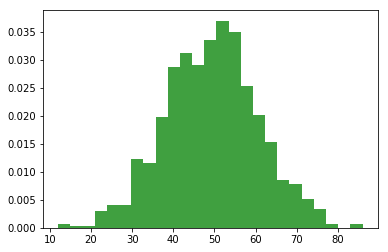

In [16]:
# 2c) Plot the histogram of the age variable
# YOUR CODE HERE
n, bins, patches = plt.hist(df['age'], 25, normed=1, facecolor='green', alpha=0.75)
f1 = plt.gcf()

In [17]:
assert f1.gca().has_data()

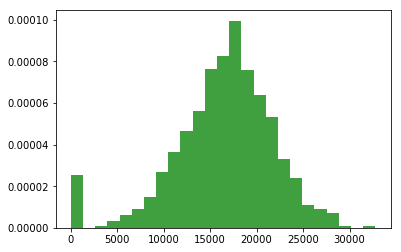

In [18]:
# 2d) Plot the histogram of the steps variable
# YOUR CODE HERE
n, bins, patches = plt.hist(df['steps'], 25, normed=1, facecolor='green', alpha=0.75)
f2 = plt.gcf()

In [19]:
assert f2.gca().has_data()

### M1 - What do you notice about steps data from the plot?

There's definitely an outlier towards 0. But otherwise, the data is mostly a normal distribution.

In [20]:
# 2e) Check how many -1 values there are in steps. Save the number into a variable called 'n_neg'

# YOUR CODE HERE
n_neg = (df['steps'] == -1).sum()

In [21]:
assert(n_neg)

In [22]:
# 2f) Remove all rows where steps is equal to -1
# YOUR CODE HERE
df = df[df.steps != -1]

In [23]:
assert -1 not in df['steps'].values

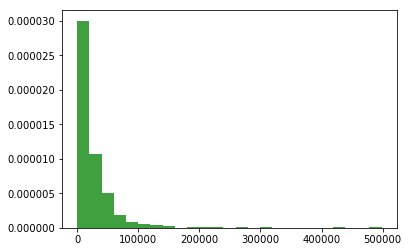

In [24]:
# 2g) Plot the histogram of the income variable
# YOUR CODE HERE
n, bins, patches = plt.hist(df['income'], 25, normed=1, facecolor='green', alpha=0.75)
f3 = plt.gcf()

In [25]:
assert f3.gca().has_data()

### M2 - What do you notice about the income data from the plot?

The income is heavily skewed right. Fewer people have higher income (which makes sense in terms how fewer people hold most of the world's wealth). More people tend to have lower incomes.

In [26]:
# 2h) For all rows in which income is equal to zero, recode income to be equal to 1
# YOUR CODE HERE
df['income'] = df['income'].replace(0, 1)

In [27]:
assert sum(df['income'] == 0.) == 0

In [28]:
# 2i) Transform income using a log10 transform
# YOUR CODE HERE
df['income'] = np.log10(df['income'])

In [29]:
assert np.isclose(min(df['income']), 0.0, 0.1)
assert np.isclose(max(df['income']), 5.69, 0.1)

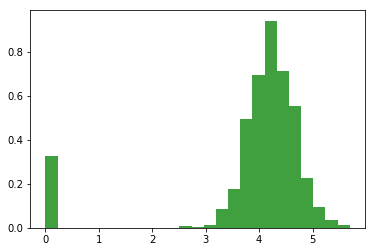

In [30]:
# 2j) Replot the histogram for income data after the data transformation
# YOUR CODE HERE
n, bins, patches = plt.hist(df['income'], 25, normed=1, facecolor='green', alpha=0.75)
f4 = plt.gcf()
df = df[df['income'] > 0]

In [31]:
assert f4.gca().has_data()

### M3 - What do you notice about the income data after you replot it?

After replotting, barring outliers near 0, the graph has a more normal distribution than before the data transformation.

In [32]:
# 2k) Remove all rows where age is less than 18
# YOUR CODE HERE
df = df[df['age'] >= 18]

In [33]:
assert min(df['age']) >= 18

### Removing outliers
Next, we're going to remove all rows where the data for the steps column exceeds +/- 3 standard deviations above or below the mean.

In [34]:
# 2l) For the steps data: 
# - Calculate what three times the standard deviation is, and save it to variables called 'std3'. 
# - Using 'std3', create new variables, called std_max' and 'std_min'.
#    These will store our cut-off values: 3 std above and below the mean respectively. 

# YOUR CODE HERE
std3 = (df['steps'].std()) * 3
std_min = df['steps'].mean() - std3
std_max = df['steps'].mean() + std3

In [35]:
assert(std3)
assert(std_min)
assert(std_max)


In [36]:
# 2m) Now use these values to remove any rows with steps data above or below these thresholds

# YOUR CODE HERE
df = df.drop(df[df['steps'] < std_min].index)
df = df.drop(df[df['steps'] > std_max].index)

In [37]:
assert min(df['steps']) > 3446
assert max(df['steps']) < 30594

In [38]:
# Check that the following test passes - if it fails, you have the wrong amount of data left. 
#  If so, go back and try to fix your cleaning steps, else your analysis answers will be wrong.
assert df.shape == (879, 4)

## Part 3 - Basic Analyses

In [43]:
# 3a) Calculate the pairwise correlations between all variables. 
#  Notes: do this with a pandas function. Keep all columns (including ID).

# YOUR CODE HERE
corrs = df.corr()

In [44]:
assert isinstance(corrs, pd.DataFrame)
assert corrs.shape == (4, 4)

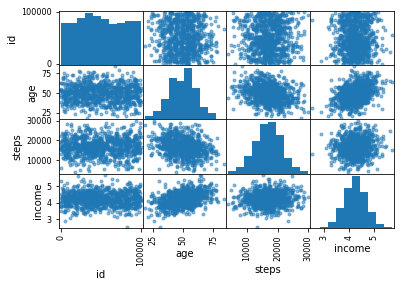

In [46]:
# 3b) Plot the data using pandas scatter_matrix, saving it to output variable name 'fd'.
# YOUR CODE HERE
fd = pd.scatter_matrix(df[['id','age', 'steps','income']])

In [47]:
fd[0][0].axes.has_data()

True

# Part 4 - Predictions

Notes:
- Use the polyfit function from np, in the way that we did in 'SectionMaterials/02-DataAnalysis
- The predictions should be in dollars (so you'll have to 'un-log' the prediction)

In [ ]:
# 4a) Use polyfit to fit a 1-degree linear model, predicting income from age.
#  Call the output parameters 'a1' and 'b1'
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(a1)
assert(b1)


In [ ]:
# 4b) Use the model parameters from 4a to predict the income of a 75 year old. Call your prediction 'pred1'.
#  Note: Convert the prediction to be in real dollars (not log dollars)
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(pred1)


In [ ]:
# 4c) Use polyfit to fit a 1-degree linear model, predicting income from steps. 
#  Call the output parameters 'a2' and 'b2'
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(a2)
assert(b2)


In [ ]:
# 4d) Predict the income of someone who took 20,000 steps. Call your prediction 'pred2'.
#  Note: Convert the prediction to be in real dollars (not log dollars)
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert(pred2)


In [ ]:
# 4e) Based on your analysis in Part 3, which model do you think is more likely to have made a good prediction?
#  Create a variable called 'better_model', and set it equal to 'age' or 'steps', whichever your answer is.
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
assert better_model

### M4 - Why do you think (whichever model you answered) is better?

YOUR ANSWER HERE

## Done! Upload this notebook to TritonED